In [35]:
import data2D as data_import
import os
import matplotlib.pyplot as plt
import numpy as np
from grid import Grid

D = 1e-8
N = 16
Q = 1e-19
M = 1e-27

plt.rcParams.update({'font.size': 20})
plt.rc('figure', figsize=(20, 10))


In [38]:
# 3.2 pico seconds for particle to travel L
def exec(dt=1e-13, dt2=1e-12, tf=1, v=5e3, r=0):

    command = f"java -cp target/SimulacionTemporal-1.0-SNAPSHOT.jar \
                -Ddt={dt} -Ddt2={dt2} -Dtf={tf} \
                -Dv={v} -Dr={r} \
                ElectricFieldSystem"
    proc = os.popen(command)
    escaped = proc.readlines()[0]
    proc.close()
    data = data_import.Data("ElectricField.txt")
    return data, int(escaped)


Initial Energy 1.25e-18


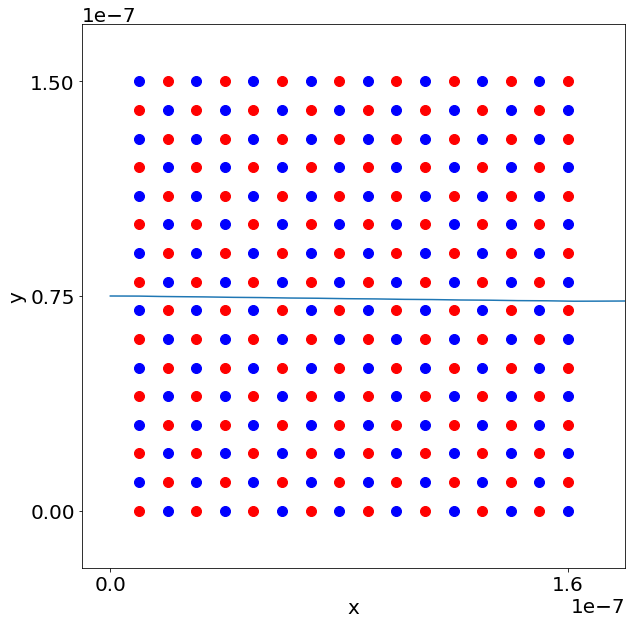

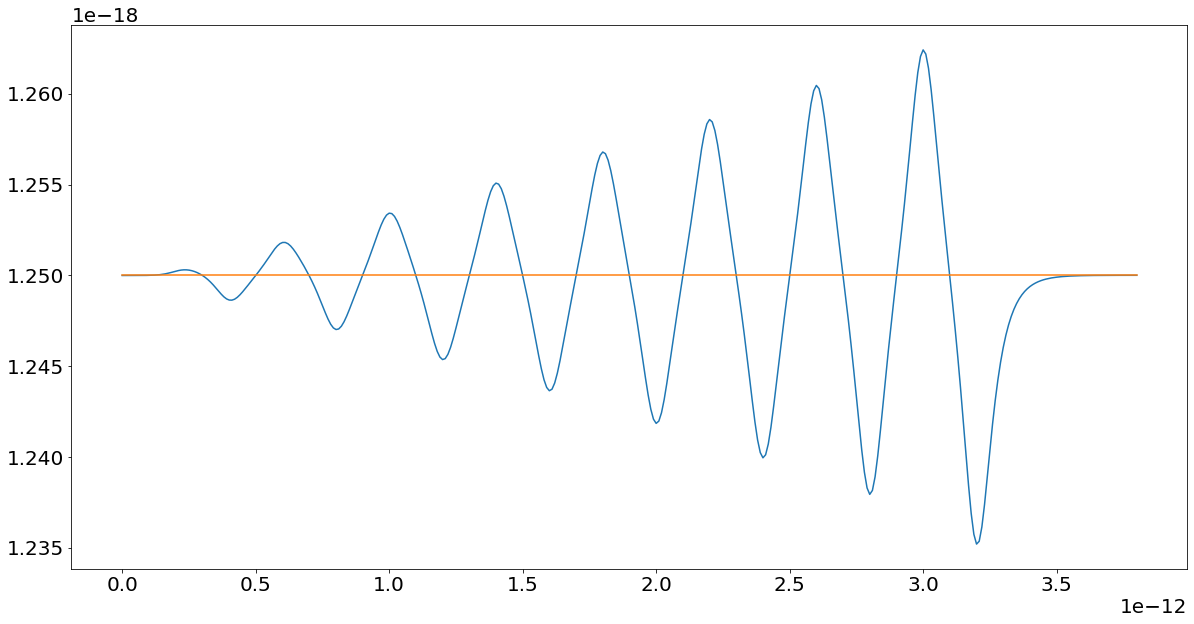

In [39]:
X = []
Y = []
E = []
T = []

grid = Grid(N, D, Q)
V = 5e4
data, escaped = exec(r=0, dt=1e-15, dt2=1e-14, v=V)
Ei = grid.calculate_energy(0, (N-1)/2, V, 0, M, Q)
print("Initial Energy", Ei)
for t, x, y, vx, vy in data:
    T.append(t)
    X.append(x)
    Y.append(y)
    E.append(grid.calculate_energy(x, y, vx, vy, M, Q))


plt.figure("Trajectory")
grid.plot()
plt.plot(X, Y, "-", markersize=1)
plt.xticks([0, N*D])
plt.yticks([0, (N-1)*D/2, N*D - D])
plt.ylim(-2*D, N*D + D)
plt.xlim(-D, N*D + 2*D)
plt.gca().set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.figure("Energy")

plt.plot(T, E)
plt.plot(T, [Ei]*len(T))
plt.show()


# 2.1

In [ ]:
Y = [-1, -0.5, 0, 0.5, 1]

V = 5e4

dts = [1e-14, 1e-13]
dt2 = 1e-13

for dt in dts:

    Es = []
    for y in Y:
        Ei = grid.calculate_energy(0, (N-1)/2 + y*D, V, 0, M, Q)
        data, escaped = exec(dt=dt, dt2=dt2, tf=1e12, v=V, r=y)

        i=0
        for t, x, y, vx, vy in data:
            if i>=len(Es):
                Es.append([])
            e = grid.calculate_energy(x, y, vx, vy, M, Q)
            Es[i].append(np.abs(1-e/Ei))
            i+=1

    errors = [np.std(e)/np.sqrt(len(e)) for e in Es]

    Es = [np.mean(e) for e in Es]

    print(Es)

    plt.errorbar(Y, Y, yerr=errors, label=f"dt={dt}")

plt.legend()
plt.xlabel("Y")
plt.ylabel("Energy")
#plt.yscale("log")
plt.show()


# 2.2

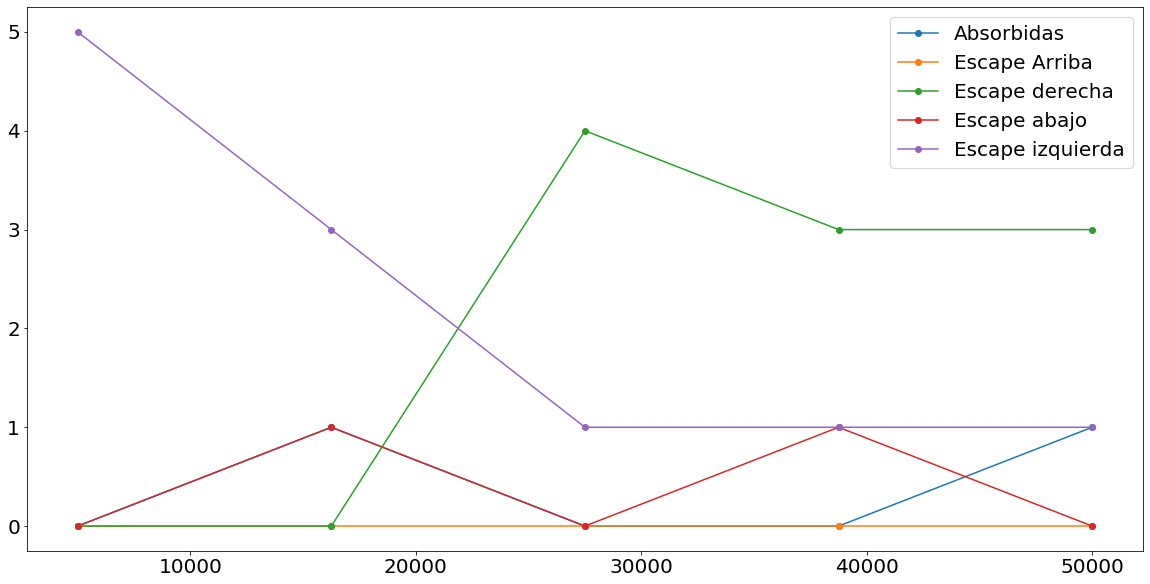

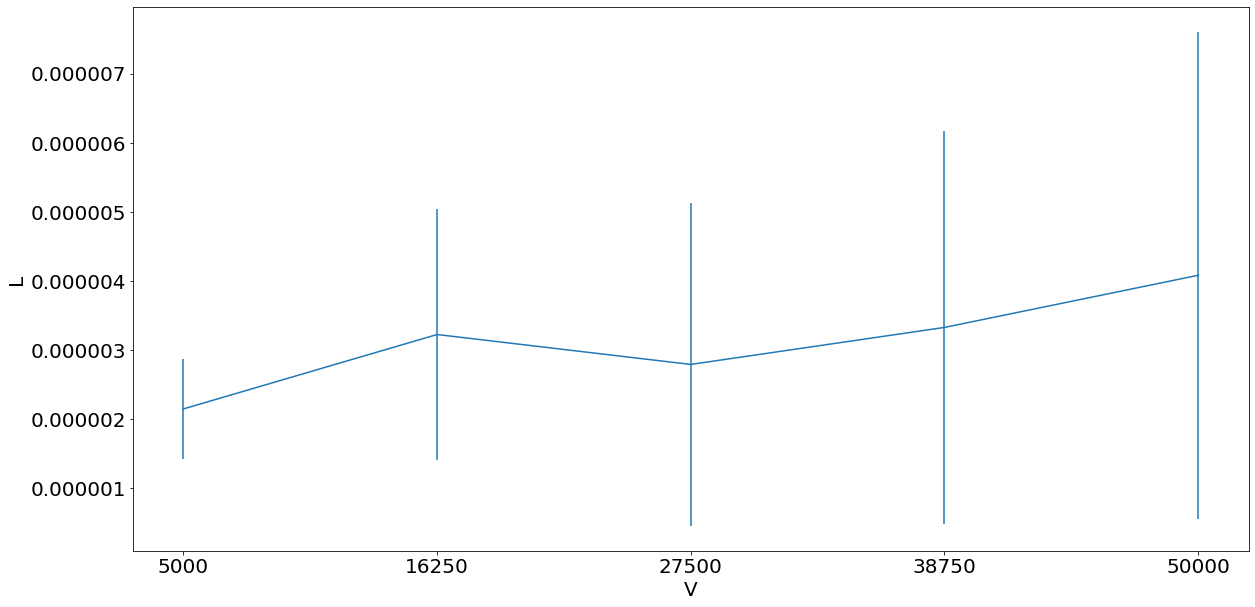

In [49]:
V = np.linspace(5e3, 5e4, 5)

Y = np.linspace(-1, 1, 5)

dt = 1e-14
dt2 = 1e-13


means = []
errors = []

escaped_arr = [[],[],[],[],[]]

for v in V:

    L = []
    escaped_sum = [0, 0, 0, 0, 0]
    for y in Y:
        data, escaped = exec(dt=dt, dt2=dt2, tf=1e12, v=v, r=y)
        escaped_sum[escaped] += 1
        long = 0
        xv = 0
        for t, x, y, vx, vy in data:
            long += np.abs(x-xv)
            xv = x
        L.append(long)

    mean = np.mean(L)
    error = np.std(L)/np.sqrt(len(L))
    means.append(mean)
    errors.append(error)

    for i, e in enumerate(escaped_sum):
        escaped_arr[i].append(e)

plt.figure("Escapadas vs V")
labels = ["Absorbidas", "Escape Arriba", "Escape derecha", "Escape abajo", "Escape izquierda"]

for i, arr in enumerate(escaped_arr):
    plt.plot(V,arr,"o-", label = labels[i])

plt.legend()
plt.show()

plt.figure("Longitud vs Velocidad")
plt.errorbar(V, means, yerr=errors)
plt.xticks(V)
plt.xlabel("V")
plt.ylabel("L")

plt.show()
